# Linear Regression Model
In this notebook I look at baseball data from 2012-2019 and create a linear model for coorelating team run differential (runs scored - runs allowed) to total number of wins and win percentage.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
df_yearly_records = pd.read_csv('2012-2019_team_records.csv')
df_yearly_records

,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed
0,Washington Nationals,WSN,2012,National,East,162,98,64,0,0.605,-,731,594
1,Atlanta Braves,ATL,2012,National,East,162,94,68,0,0.580,4,700,600
2,Philadelphia Phillies,PHI,2012,National,East,162,81,81,0,0.500,17,684,680
3,New York Mets,NYM,2012,National,East,162,74,88,0,0.457,24,650,709
4,Miami Marlins,MIA,2012,National,East,162,69,93,0,0.426,29,609,724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Houston Astros,HOU,2019,American,West,162,107,55,0,0.660,-,920,640
236,Oakland Athletics,OAK,2019,American,West,162,97,65,0,0.599,10,845,680
237,Texas Rangers,TEX,2019,American,West,162,78,84,0,0.481,29,810,878
238,Anaheim Angels,LAA,2019,American,West,162,72,90,0,0.444,35,769,868


In [3]:
y = df_yearly_records['Win_Percentage'].values
y_wins = df_yearly_records['Wins'].values
X_scored = df_yearly_records['Runs_Scored'].values
X_allowed = df_yearly_records['Runs_Allowed'].values
X_delta = X_scored - X_allowed
X_delta_p = X_scored / X_allowed

# Run Metrics as a predictor of team success
The overall runs scored and runs allowed are weaker predictors than the run differential.  You can see on the graph below that you get a much tighter band with the run delta

In [6]:
LR = LinearRegression()
LR.fit(X_delta_p.reshape(-1,1), y_wins)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
scores = cross_val_score(estimator=LR,
                             X=X_delta_p.reshape(-1,1),
                             y=y_wins,
                             cv=10,
                             n_jobs=1)
print(np.mean(scores))

0.8485452475133229


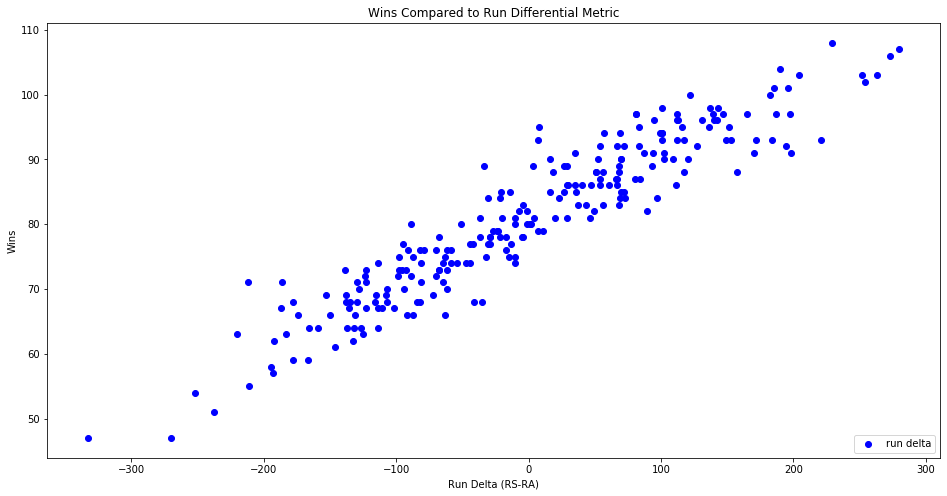

In [4]:
plt.figure(figsize=(16,8))
plt.scatter(X_delta, y_wins, color='blue', label='run delta')
plt.xlabel('Run Delta (RS-RA)')
plt.ylabel('Wins')
plt.title('Wins Compared to Run Differential Metric')
plt.legend(loc="lower right")
plt.show()

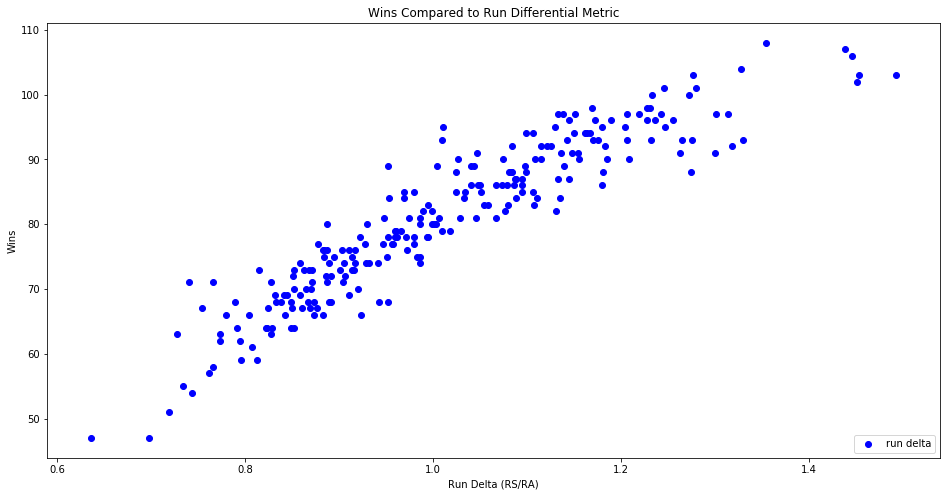

In [105]:
plt.figure(figsize=(16,8))
plt.scatter(X_delta_p, y_wins, color='blue', label='run delta')
plt.xlabel('Run Delta (RS/RA)')
plt.ylabel('Wins')
plt.title('Wins Compared to Run Differential Metric')
plt.legend(loc="lower right")
plt.show()

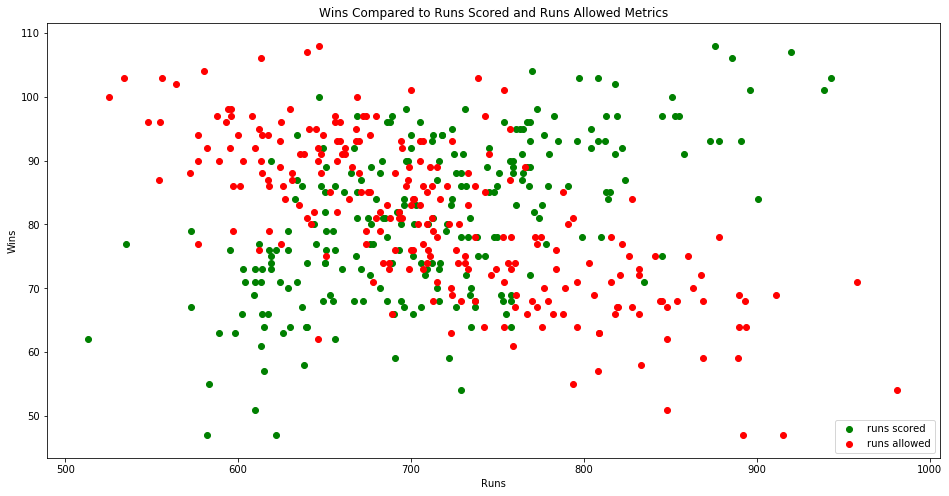

In [106]:
plt.figure(figsize=(16,8))
plt.scatter(X_scored,y_wins, color='green', label='runs scored')
plt.scatter(X_allowed, y_wins, color='red', label='runs allowed')
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.title('Wins Compared to Runs Scored and Runs Allowed Metrics')
plt.legend(loc="lower right")
plt.show()

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaling does not change the model outcome
X_t = scaler.fit_transform(X_delta_p.reshape(-1,1))

#no difference between x_delta and scaled x_delta performance so I don't use it in the regression modeling
X_d_t = scaler.fit_transform(X_delta.reshape(-1,1))

There is a slight difference in the accuracy between the models that compare run delta to wins and to winning percentage.  The Run delta model gives a much better prediction on overall team performance wholistically than does runs scored or runs allowed.

While the run delta and the run delta as percent perform equally well (within 2%), I think the run delta as percent is more applicable if you tracking things in real time throughout the season.  I will use it as my metric since it is more universal and less tied to a specific season length

In [108]:
LR = LinearRegression().fit(X_t.reshape(-1,1),y)
print(f'Score for Run Delta as Percent (WP): {LR.score(X_t.reshape(-1,1),y)}')
M_X_t = LR.coef_
B_X_t = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')      

Score for Run Delta as Percent (WP): 0.864881150389019
Slope: [0.06932758]
Intercept: 0.49999583333333325


In [110]:
LR = LinearRegression().fit(X_delta_p.reshape(-1,1),y_wins)
print(f'Score for Run Delta as Percent (WP): {LR.score(X_delta_p.reshape(-1,1),y_wins)}')
M_X_t = LR.coef_
B_X_t = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')   

Score for Run Delta as Percent (WP): 0.8647819000544082
Slope: [68.84091369]
Intercept: 11.139614917371347


In [79]:
LR = LinearRegression().fit(X_delta.reshape(-1,1),y)
print(f'Score for run Delta (WP): {LR.score(X_delta.reshape(-1,1),y)}')

Score for run Delta (WP): 0.8863669620763786


In [80]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_delta.reshape(-1,1),y_wins)
print(f'Model Score for run Delta: {LR.score(X_delta.reshape(-1,1),y_wins)}')

Model Score for run Delta: 0.8865070684830539


In [81]:
LR = LinearRegression().fit(X_scored.reshape(-1,1),y_wins)
print(f'Model Score for runs Scored: {LR.score(X_scored.reshape(-1,1),y_wins)}')

Model Score for runs Scored: 0.3378296985104512


In [82]:
LR = LinearRegression().fit(X_allowed.reshape(-1,1),y_wins)
print(f'Score for runs allowed: {LR.score(X_allowed.reshape(-1,1),y_wins)}')

Score for runs allowed: 0.5321497522112286


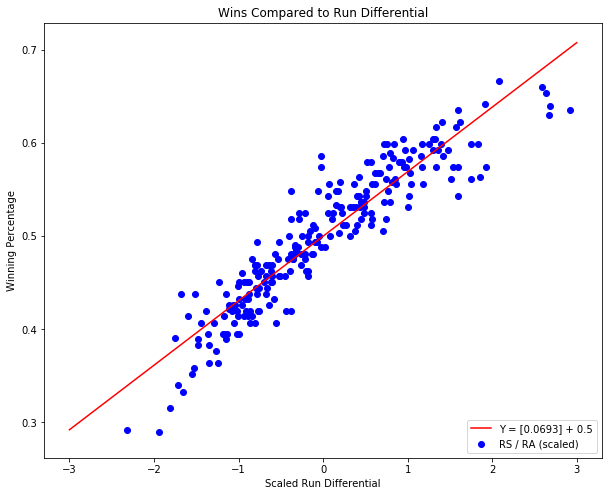

In [83]:
plt.figure(figsize=(10,8))
plt.scatter(X_t, y, color='blue', label='RS / RA (scaled)')
X_fit = np.linspace(-3,3,100)
y_fit = M_X_t * X_fit + B_X_t
plt.plot(X_fit, y_fit, color='red', label=f'Y = {M_X_t.round(4)} + {B_X_t.round(4)}')
plt.xlabel('Scaled Run Differential')
plt.ylabel('Winning Percentage')
plt.title('Wins Compared to Run Differential')
plt.legend(loc='lower right')
plt.show()

# What happens when I segregate the data by league?

In [84]:
#create a boolean mask of the dataframe
national = df_yearly_records.loc[:,'League'] == 'National'
american = df_yearly_records.loc[:,'League'] == 'American'

## National League

In [85]:
y_national = (df_yearly_records.loc[national.values])['Win_Percentage'].values
X_scored_national = (df_yearly_records.loc[national.values])['Runs_Scored'].values
X_allowed_national = (df_yearly_records.loc[national.values])['Runs_Allowed'].values
X_delta_p_national = X_scored_national / X_allowed_national

In [86]:
#scale the run delta for the national league
X_t_nat = scaler.fit_transform(X_delta_p_national.reshape(-1,1))

In [87]:
LR = LinearRegression().fit(X_t_nat.reshape(-1,1),y_national)
print(f'Score for Run Delta as Percent (WP): {LR.score(X_t_nat.reshape(-1,1),y_national)}')
M_X_t_nat = LR.coef_
B_X_t_nat = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')   

Score for Run Delta as Percent (WP): 0.8820640113056849
Slope: [0.06555754]
Intercept: 0.4982583333333333


In [88]:
LR = LinearRegression().fit(X_delta_p_national.reshape(-1,1),y_national)
print(f'Score for Run Delta as Percent (WP): {LR.score(X_delta_p_national.reshape(-1,1),y_national)}')
M_X_t_nat_ns = LR.coef_
B_X_t_nat_ns = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')   

Score for Run Delta as Percent (WP): 0.8820640113056849
Slope: [0.42216377]
Intercept: 0.07237102138135998


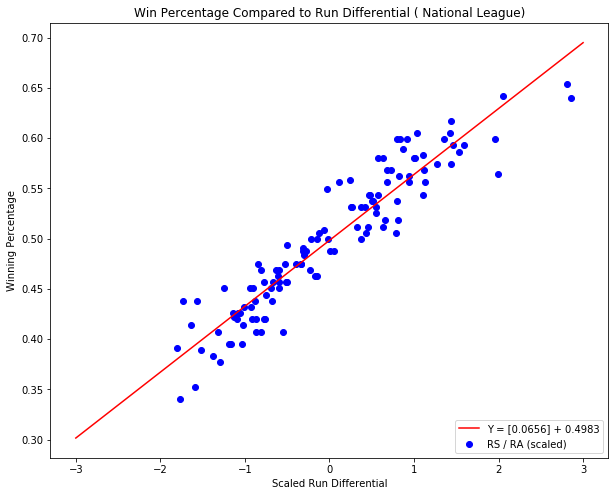

In [89]:
plt.figure(figsize=(10,8))
plt.scatter(X_t_nat, y_national, color='blue', label='RS / RA (scaled)')
X_fit_nat = np.linspace(-3,3,100)
y_fit_nat = M_X_t_nat * X_fit + B_X_t_nat
plt.plot(X_fit_nat, y_fit_nat, color='red', label=f'Y = {M_X_t_nat.round(4)} + {B_X_t_nat.round(4)}')
plt.xlabel('Scaled Run Differential')
plt.ylabel('Winning Percentage')
plt.title('Win Percentage Compared to Run Differential ( National League)')
plt.legend(loc='lower right')
plt.show()

Interestingly, there doesn't seem to be a difference with and without the scaler

## American League

In [90]:
y_american = (df_yearly_records.loc[american.values])['Win_Percentage'].values
X_scored_american = (df_yearly_records.loc[american.values])['Runs_Scored'].values
X_allowed_american = (df_yearly_records.loc[american.values])['Runs_Allowed'].values
X_delta_p_american = X_scored_american / X_allowed_american

In [91]:
#scale the run delta for the national league
X_t_amr = scaler.fit_transform(X_delta_p_national.reshape(-1,1))

In [92]:
 LR = LinearRegression().fit(X_t_amr.reshape(-1,1),y_american)
print(f'Score for Run Delta as Percent (WP): {LR.score(X_t_amr.reshape(-1,1),y_american)}')
M_X_t_amr = LR.coef_
B_X_t_amr = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')  

Score for Run Delta as Percent (WP): 0.44498104772383623
Slope: [0.05267704]
Intercept: 0.5017333333333334


This is really interesting, it shows that scaled run differentials doesn't seem to track AT ALL for the american league

In [93]:
LR = LinearRegression().fit(X_delta_p_american.reshape(-1,1),y_american)
print(f'Score for Run Delta as Percent (WP): {LR.score(X_delta_p_american.reshape(-1,1),y_american)}')
M_X_t_amr_ns = LR.coef_
B_X_t_amr_ns = LR.intercept_
print(f'Slope: {LR.coef_}')
print(f'Intercept: {LR.intercept_}')   

Score for Run Delta as Percent (WP): 0.8515350992087709
Slope: [0.42655006]
Intercept: 0.06646677328420303


I think I know what may have happened here... I scaled them seperately which means that I can't really graph them on the same axis because they no longer have the same mean and standard deviations.  It also mean that maybe I shouldn't scale them for the linear regression...

Now that I've looked at the graphs, I REALLY dont know what happened.  They are equivalent, but the scaled model says that it is half as accurate, which makes no sense

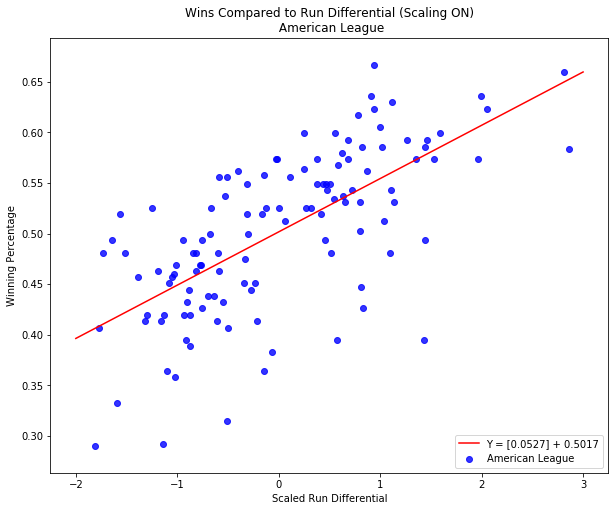

In [94]:
plt.figure(figsize=(10,8))
plt.scatter(X_t_amr, y_american, color='blue', label='American League', alpha=0.8)

X_fit = np.linspace(-2,3,100)
y_fit_amr = M_X_t_amr * X_fit + B_X_t_amr
plt.plot(X_fit, y_fit_amr, color='red', label=f'Y = {M_X_t_amr.round(4)} + {B_X_t_amr.round(4)}')
plt.xlabel('Scaled Run Differential')
plt.ylabel('Winning Percentage')
plt.title('Wins Compared to Run Differential (Scaling ON)\n American League')
plt.legend(loc='lower right')
plt.show()

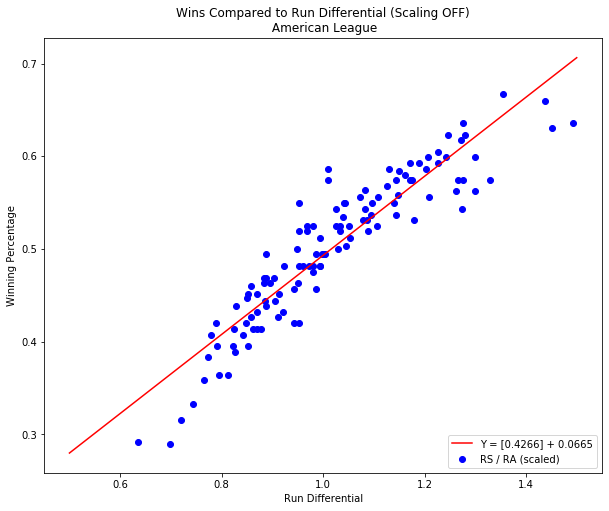

In [95]:
plt.figure(figsize=(10,8))
plt.scatter(X_delta_p_american, y_american, color='blue', label='RS / RA (scaled)')
X_fit = np.linspace(.5,1.5,100)
y_fit_amr = M_X_t_amr_ns * X_fit + B_X_t_amr_ns
plt.plot(X_fit, y_fit_amr, color='red', label=f'Y = {M_X_t_amr_ns.round(4)} + {B_X_t_amr_ns.round(4)}')
plt.xlabel('Run Differential')
plt.ylabel('Winning Percentage')
plt.title('Wins Compared to Run Differential (Scaling OFF)\n American League')
plt.legend(loc='lower right')
plt.show()

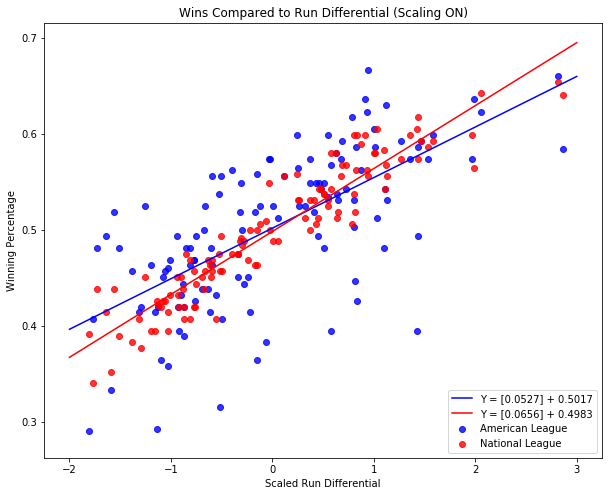

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(X_t_amr, y_american, color='blue', label='American League', alpha=0.8)
plt.scatter(X_t_nat, y_national, color='red', label = 'National League', alpha=0.8)

X_fit = np.linspace(-2,3,100)
y_fit_amr = M_X_t_amr * X_fit + B_X_t_amr
y_fit_nat = M_X_t_nat * X_fit + B_X_t_nat
plt.plot(X_fit, y_fit_amr, color='blue', label=f'Y = {M_X_t_amr.round(4)} + {B_X_t_amr.round(4)}')
plt.plot(X_fit, y_fit_nat, color='red', label=f'Y = {M_X_t_nat.round(4)} + {B_X_t_nat.round(4)}')

plt.xlabel('Scaled Run Differential')
plt.ylabel('Winning Percentage')
plt.title('Wins Compared to Run Differential (Scaling ON)')
plt.legend(loc='lower right')
plt.show()

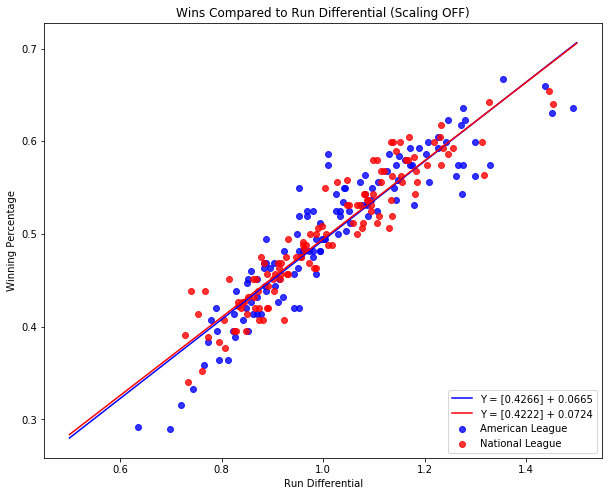

In [97]:
plt.figure(figsize=(10,8))
plt.scatter(X_delta_p_american, y_american, color='blue', label='American League', alpha=0.8)
plt.scatter(X_delta_p_national, y_national, color='red', label = 'National League', alpha=0.8)

X_fit = np.linspace(0.5,1.5,100)
y_fit_amr = M_X_t_amr_ns * X_fit + B_X_t_amr_ns
y_fit_nat = M_X_t_nat_ns * X_fit + B_X_t_nat_ns
plt.plot(X_fit, y_fit_amr, color='blue', label=f'Y = {M_X_t_amr_ns.round(4)} + {B_X_t_amr_ns.round(4)}')
plt.plot(X_fit, y_fit_nat, color='red', label=f'Y = {M_X_t_nat_ns.round(4)} + {B_X_t_nat_ns.round(4)}')

plt.xlabel('Run Differential')
plt.ylabel('Winning Percentage')
plt.title('Wins Compared to Run Differential (Scaling OFF)')
plt.legend(loc='lower right')
plt.show()

#  Does the hometeam have, on average, an advantage?

In [98]:
home = (pd.read_csv("2019_all.csv").loc[:,'Home_Win'] == 'W')
value,count = np.unique(home.values,return_counts=True)
print(value,count)
print(f'Home team winning percentage: {round(count[1]/(sum(count)),3)}')
print(f'Away team winning percentage: {round(count[0]/(sum(count)),3)}')
print(f'Home team odds: {round((count[1] / sum(count)) / (count[0] / sum(count)),3)}')

[False  True] [1143 1286]
Home team winning percentage: 0.529
Away team winning percentage: 0.471
Home team odds: 1.125


# Team Run differential vs wins over time
The team run differentials converge fairly quickly at the beginning of the season - within ~25 games the average has been established for the remainder of the season and the linear trend of increasing wins is created.  There are some fluctuations, buton average they appear to be minor

In [99]:
def get_teams():
    teams = [item.strip() for item in open("all_teams.txt",'r')]
    return teams

teams = get_teams()

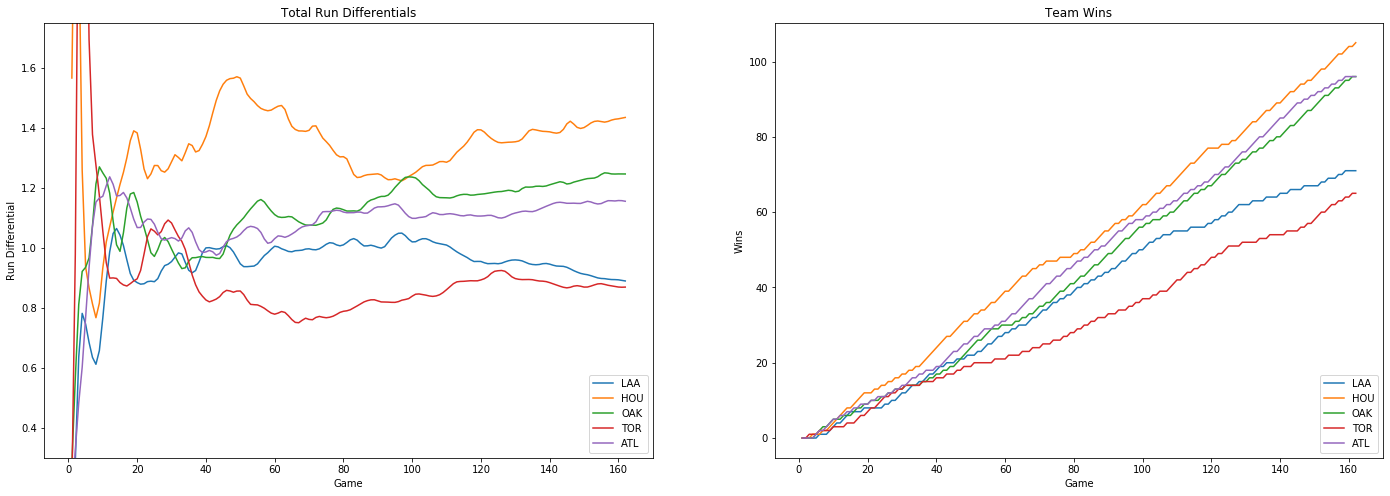

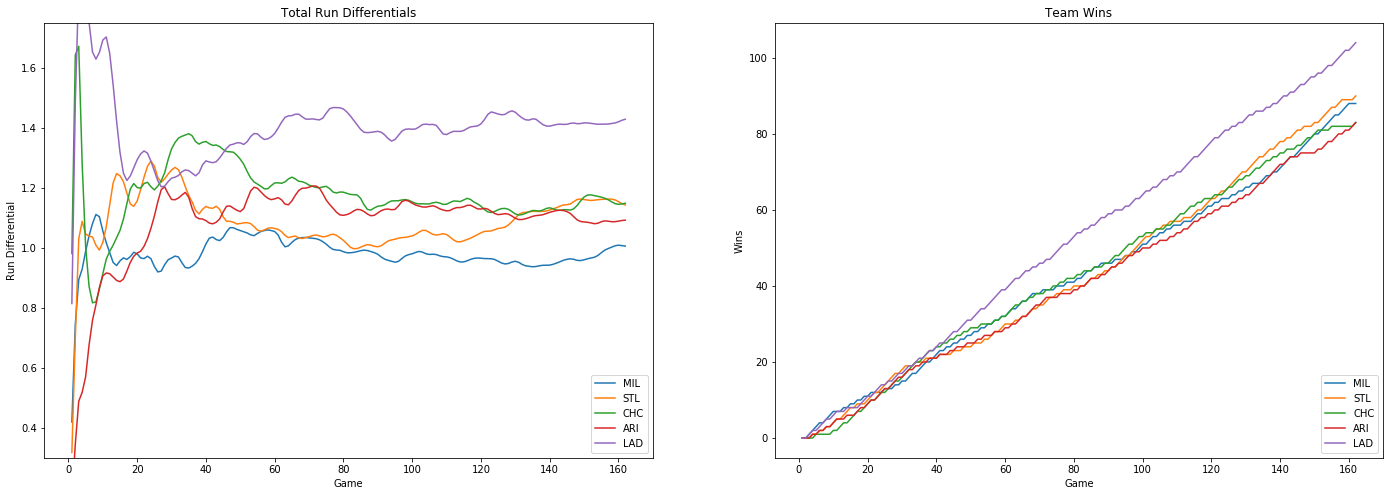

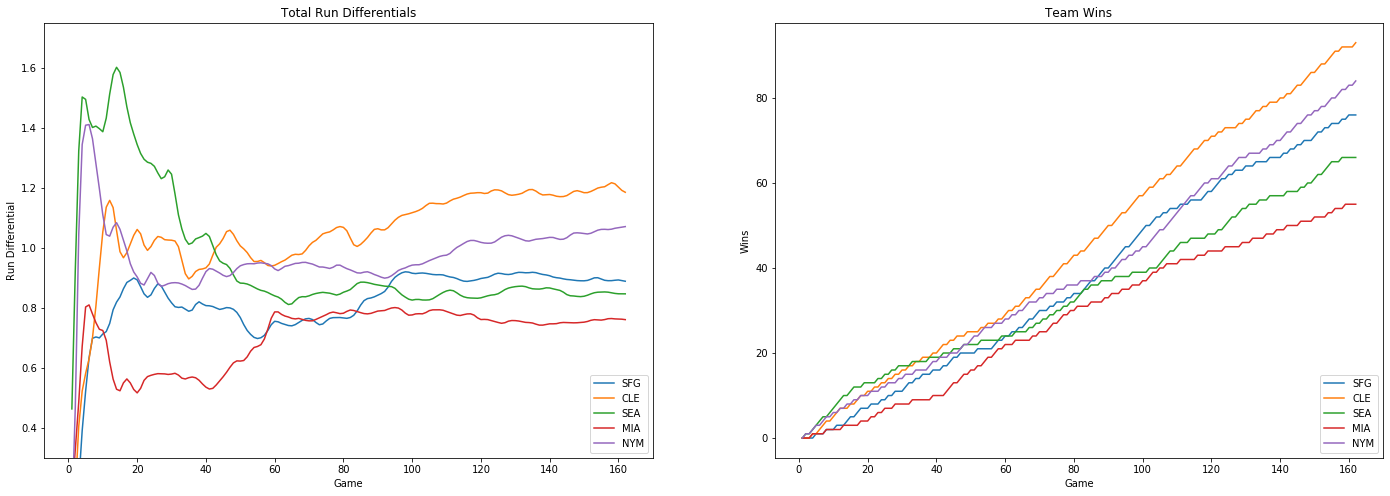

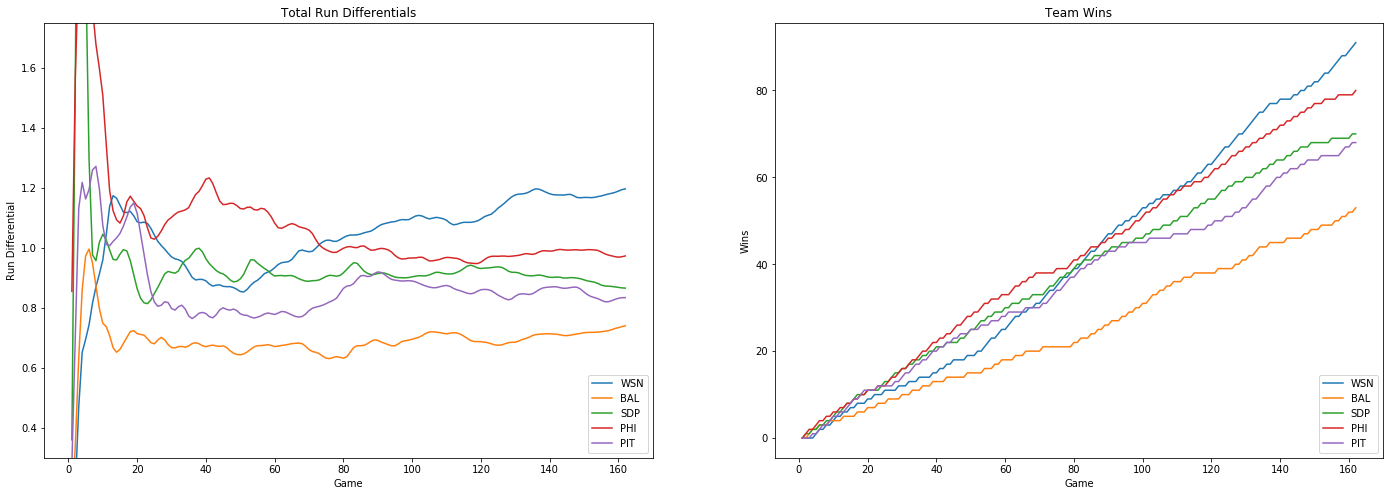

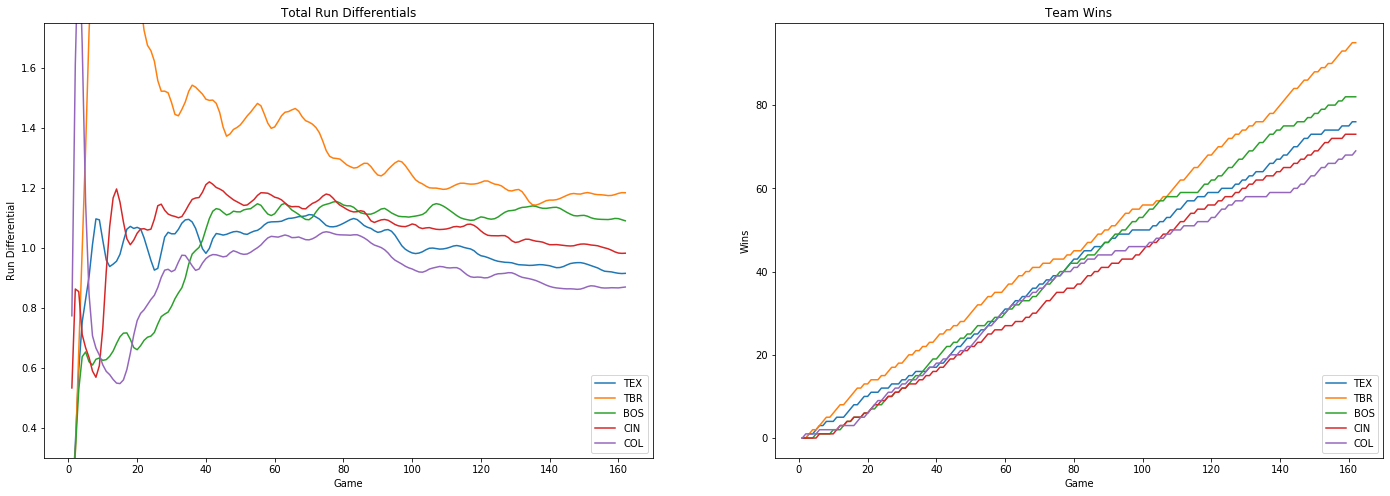

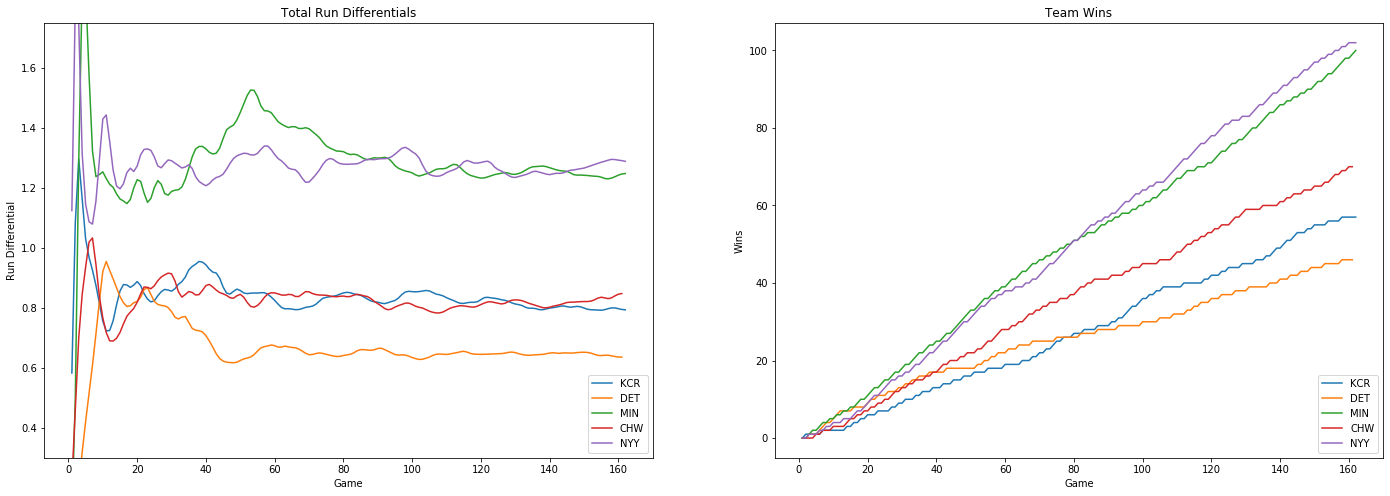

In [100]:
from scipy.ndimage.filters import gaussian_filter1d



for i in range(0,len(teams),5):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(24,8))
    ax1.set_ylim(0.3,1.75)
    ax1.set_title('Total Run Differentials')
    ax1.set_ylabel('Run Differential')
    ax1.set_xlabel('Game')
    
    ax2.set_title('Team Wins')
    ax2.set_ylabel('Wins')
    ax2.set_xlabel('Game')
    for team in teams[i:i+5]:
        df = pd.read_csv(f"Data\\Team_Runs\\2019_{team}_runs.csv")
        X = df['Gm#'].values
        y = gaussian_filter1d(df['Delta_Percentage'].values,sigma=1)
        ax1.plot(X,y,label=team)
        
        X2 = df['Gm#'].values
        y2 = gaussian_filter1d(df['Wins_Total'].values,sigma=1)
        ax2.plot(X2,y2,label=team)
    

    
#plt.ylim(0,1.75)
    ax1.legend(loc='lower right')
    ax2.legend(loc='lower right')

#plt.show()

DET here is a notable example where we can see that the Run differential has not converged by game ~25.  Their team doesn't average out until around 50 games and we can see that the games won effect isn't seen until ~game 80 when they are over taken by the KCR.

Run differential is directly proportional to wins which is directly proportional to win percentage.  

Say I have a team that is projected to win 100 games vs a team that is projected to win 50 games.  This would imply that the 100 win team is 2x better than the 50 win team.  Meaning they should win 66% of games that they play against eachother.  But if you have a team projected to win 80 games vs a team projected to win 70 games  The 80 game team is only 1.14x better and should win ~53.2% of games they play against each other.  So teams that have a similar win record are very difficult to predict the outcome for with any accuracy over just blind guessing.

As seen in the WinRate Probability notebook, using win record as your only metric produces accurate results 58% of the time.